In [1]:
#import of the libs
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from graphviz import Source
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Procesamiento de la data

In [2]:
songs_df = pd.read_csv('songs.csv')
songs_df.head()

#obtener las variables numéricas
numerical_cols = [cname for cname in songs_df.columns if songs_df[cname].dtype in ['int64', 'float64']]
numerical_cols.remove('mode')

#obtener las variables categoricas
categorical_cols = [cname for cname in songs_df.columns if songs_df[cname].dtype in ["object", "bool"]]
categorical_cols.append('mode')



# Arbol de regresiones

In [9]:
#create the model
regressorTree = DecisionTreeRegressor()
PregressorTree = DecisionTreeRegressor(criterion='poisson')
#preprocess the data
songs_df = songs_df[numerical_cols]
y = songs_df['popularity']
X = songs_df.drop('popularity',axis=1)
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.3)



In [10]:
#train the model
regressorTree.fit(X_train, y_train)
PregressorTree.fit(X_train, y_train)
#see the model 


DecisionTreeRegressor(criterion='poisson')

In [14]:
# test the model
dt_scores = cross_val_score(regressorTree, X_train, y_train, cv = 5)
print("mean cross validation score: {}".format(np.mean(dt_scores)))
print("score without cv: {}".format(regressorTree.score(X_train, y_train)))
predicted = regressorTree.predict(X_test)
pred_ptree = PregressorTree.predict(X_test)
# on the test or hold-out set
print("metrics for normal regressor")
print(f"RMSE {root_mean_squared_error(y_test,predicted)}")
print(f"MSE {mean_squared_error(y_test,predicted)}")
print(f"MAE {mean_absolute_error(y_test,predicted)}")
print(f"R2 SCORE {r2_score(y_test,predicted)}")
print()
print("metrics for poissson regressor")
print(f"RMSE {root_mean_squared_error(y_test,pred_ptree)}")
print(f"MSE {mean_squared_error(y_test,pred_ptree)}")
print(f"MAE {mean_absolute_error(y_test,pred_ptree)}")
print(f"R2 SCORE {r2_score(y_test,pred_ptree)}")

mean cross validation score: -1.0105560556524824
score without cv: 0.9997326686592957
metrics for normal regressor
RMSE 29.815040946922522
MSE 888.9366666666666
MAE 19.486666666666668
R2 SCORE -0.7604229356015073

metrics for poissson regressor
RMSE 31.33214058179338
MSE 981.7030334372636
MAE 20.911694444444443
R2 SCORE -0.9441346057790383


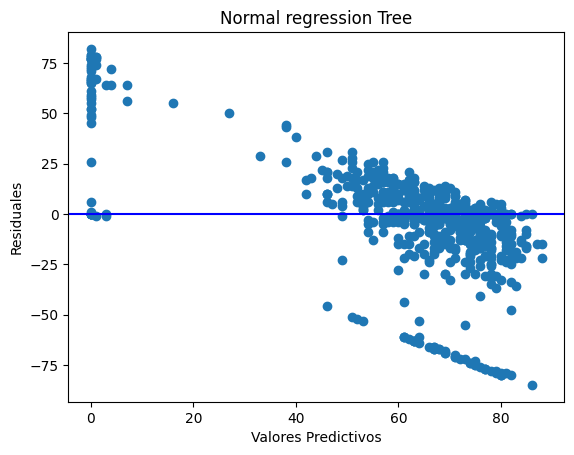

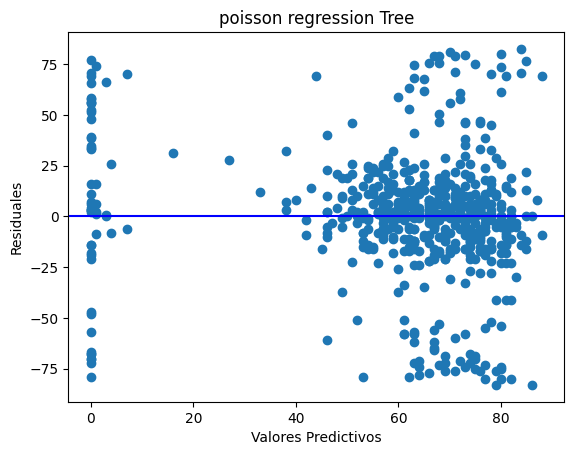

In [13]:
#residuales
residuals=y_test- predicted
plt.scatter(predicted,residuals)
plt.axhline(0,color='blue')
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')
plt.title('Normal regression Tree')
plt.show()
plt.scatter(predicted,(y_test - pred_ptree))
plt.axhline(0,color='blue')
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')
plt.title('poisson regression Tree')
plt.show()

# Clasification tree

In [41]:
# crear las categorias	por cuartiles para baja popularidad , cancion regular, viral y exíto correspondiente a 0,1,2,3

p25 = songs_df['popularity'].quantile(0.25)
p50 = songs_df['popularity'].quantile(0.50)
p75 = songs_df['popularity'].quantile(0.75)

songs_df['popularityCategory'] = pd.cut(songs_df['popularity'], bins=[0, p25, p50, p75, float('inf')],
                               labels=[0,1,2,3], right=False)

# drop population column since is not in use anymore
songs_df = songs_df.drop('popularity',axis=1)
print(songs_df.head())

   duration_ms  year  danceability  energy  key  loudness  speechiness  \
0       211160  2000         0.751   0.834    1    -5.444       0.0437   
1       167066  1999         0.434   0.897    0    -4.918       0.0488   
2       250546  1999         0.529   0.496    7    -9.007       0.0290   
3       224493  2000         0.551   0.913    0    -4.063       0.0466   
4       200560  2000         0.614   0.928    8    -4.806       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo  \
0        0.3000          0.000018    0.3550    0.894   95.053   
1        0.0103          0.000000    0.6120    0.684  148.726   
2        0.1730          0.000000    0.2510    0.278  136.859   
3        0.0263          0.000013    0.3470    0.544  119.992   
4        0.0408          0.001040    0.0845    0.879  172.656   

  popularityCategory  
0                  3  
1                  3  
2                  2  
3                  3  
4                  1  


In [42]:
# create and fit the modewith the data
y = songs_df['popularityCategory'] 
X = songs_df.drop('popularityCategory',axis=1)
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X.head())

   duration_ms  year  danceability  energy  key  loudness  speechiness  \
0       211160  2000         0.751   0.834    1    -5.444       0.0437   
1       167066  1999         0.434   0.897    0    -4.918       0.0488   
2       250546  1999         0.529   0.496    7    -9.007       0.0290   
3       224493  2000         0.551   0.913    0    -4.063       0.0466   
4       200560  2000         0.614   0.928    8    -4.806       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo  
0        0.3000          0.000018    0.3550    0.894   95.053  
1        0.0103          0.000000    0.6120    0.684  148.726  
2        0.1730          0.000000    0.2510    0.278  136.859  
3        0.0263          0.000013    0.3470    0.544  119.992  
4        0.0408          0.001040    0.0845    0.879  172.656  


In [44]:
from sklearn.tree import DecisionTreeClassifier
regressorTree = DecisionTreeClassifier().fit(X_train, y_train)

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, regressorTree.predict(X_test))
print("Matriz de Confusión:\n", cm)

Matriz de Confusión:
 [[41 38 32 19]
 [37 64 30 38]
 [33 36 43 27]
 [32 40 32 58]]
